# Disciplina: Ciência de Dados

Prof. Luiz Affonso Guedes Engenharia de Computação - UFRN 2018-2

## Conteúdo:  Pacote Seaborn

O Seaborn fornece uma API no topo do Matplotlib que oferece opções para o estilo de gráficos e os padrões de cores, define funções simples de alto nível para tipos de plots de dados estatísticos e integra-se com a funcionalidade fornecida pela Pandas DataFrames.

### Exemplo de uso do MatPlot

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# Criação de dados randômicos
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

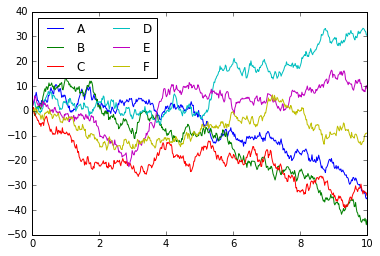

In [3]:
# Plot dos dados com o pacote Matplotlib
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [4]:
# Importação e configuração para opadrão Seaborn
import seaborn as sns
sns.set()

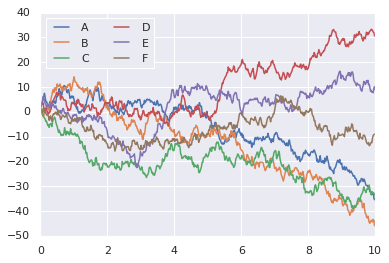

In [5]:
# Mesmo programa do exemplo anterior, porém com Seaborn
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### Plots com Seaborn
A principal idéia da Seaborn é que ele fornece comandos de alto nível para criar uma variedade de tipos de gráficos úteis para a exploração de dados estatísticos e até mesmo alguns modelos de modelos estatísticos.

Vamos dar uma olhada em alguns dos conjuntos de dados e tipos de plots disponíveis em Seaborn. Observe que tudo o que se segue pode ser feito usando comandos Matplotlib, porém a API Seaborn é muito mais conveniente.

####  Histogramas, KDE, and densidades

Muitas vezes, na visualização de dados estatísticos, tudo o que você quer é traçar histogramas e distribuições conjuntas de variáveis. Vimos que isso é relativamente direto no Matplotlib.

In [ ]:
# Exemplo de histogramas

data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

In [ ]:
# Suavização de curva com Seaborn
# Usando estimação de densidade de kernel - kernel density estimation
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

In [ ]:
# Combinando histograma com KDE
sns.distplot(data['x'])
sns.distplot(data['y']);

In [ ]:
# Se for passado um dataset bi-dimensional para o método kdeplot(),
# será visualizado a curva de superfícies do gráfico.
sns.kdeplot(data);

Podemos ver a distribuição conjunta e as distribuições marginais em conjunto usando o método sns.jointplot( ). Para esse plot, definiremos o estilo em um fundo branco.

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

Existem outros parâmetros que podem ser passados para o método joinplot(), por exemplo, podemos usar um histograma hexagonal em vez disso.


In [ ]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

#### Plots aos Pares

Quando se usa conjuntos de dados de dimensões maiores que 02, você termina utilizando gráficos de pares de variáveis. Isso é muito útil para explorar correlações entre dados multidimensionais, quando você deseja traçar todos os pares de valores uns contra os outros.

Vamos demonstrar isso com o bem conhecido conjunto de dados Iris, que lista medidas de pétalas e sépalas de três espécies de íris.

In [ ]:
# Exemplo do dataset Iris
iris = sns.load_dataset("iris")
iris.head()

In [ ]:
# Para visualizar as relações multidimensionais entre as amostras
# aos pares basta utilizar o método sns.pairplot()

sns.pairplot(iris, hue='species', size=2.5);

#### Histogramas com facetas

Às vezes, a melhor maneira de ver dados é através de histogramas de subconjuntos. O FacetGrid de Seaborn torna isso extremamente simples. Vamos dar uma olhada em alguns dados que mostram o valor que a equipe do restaurante recebe em gorgeta com base em vários dados de indicadores.

In [ ]:
# Exemplo com o dataset 'tips'
tips = sns.load_dataset('tips')
tips.head()

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

- Quem geralmente dá melhores gorgetas, mulheres ou homens? 
- O valor da conta tem relação com o valor da gorgeta?

#### Plots de fatores

Os gráficos de fatores (factorplot) também podem ser úteis para esse tipo de visualização. Isso permite que você visualize a distribuição de um parâmetro dentro dos compartimentos definidos por qualquer outro parâmetro.
- Generalização do boxplot - é apenas uma das opções.



In [ ]:
# Exemplo de factorplot
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

#### Distribuições conjuntas

Semelhante ao parplot que vimos anteriormente, podemos usar sns.jointplot para mostrar a distribuição conjunta entre conjuntos de dados diferentes, juntamente com as distribuições marginais associadas.

In [ ]:
# Exemplo de uso do jointplot - distribuição conjunta
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

In [ ]:
# O plot pode ser usar o KDE e regessão 
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

#### Plots de Barras
Sérias temporais podem ser plotadas usando-se o método sns.factorplot().

In [ ]:
# Exemplo como o dataset Planets
planets = sns.load_dataset('planets')
planets.head()

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

In [ ]:
# Exemplo - método utilizado para descoberta dos planetas entre 2001 e 2015
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

#### Exemplo: Calculando o tempo para completar uma maratona
- Analisar e visualizar os dados.
- Obter os dados da Internet

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv')
data.to_csv("arquivo.csv")  # salvar DataFrame como arquivo .csv
data.head()

In [ ]:
# Vendo o tipo dos dados:
data.dtypes

As colunas de tempo (split, final) foram carregadas como objetos string.
Precisamos converter essas colunas em tipo dataTime.

In [ ]:
data['split_dataTime'] = pd.to_datetime(data['split'])
data['final_dataTime'] = pd.to_datetime(data['final'])


In [ ]:
data.dtypes

In [ ]:
data.head()

A seguir são os procedimentos para conveter os tipos String para Tipo times.

In [ ]:
# Função para tranformar String em tipo Time
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return pd.datetools.timedelta(hours=h, minutes=m, seconds=s)

In [ ]:
data1 = pd.read_csv('arquivo.csv', converters={'split':convert_time,'final':convert_time})
#data1.head()

In [ ]:
data1.head()

In [ ]:
data1.dtypes

In [ ]:
# Incluir colunas com tempo em segundos

data1['split_sec'] = data1['split'].astype(int) / 1E9
data1['final_sec'] = data1['final'].astype(int) / 1E9
data1.head()

In [ ]:
# Usando o método joitplot()

with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data1, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

In [ ]:
# Inclusão de mais uma coluna Split_frac
# que mede o grau em que cada corredor
# correu mais rápido a segunda metade da maratona em relação à primeira

data1['split_frac'] = 1 - 2 * data1['split_sec'] / data1['final_sec']
data1.head()

In [ ]:
# Explique o significado do gráfico a seguir

sns.distplot(data1['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [ ]:
# calcule a quantidade de corredores
# que foram mais rápidos na segunda metade da maratona



In [ ]:
# Qual foi o tempo e o sexo do ganhador?
# Ele/ela correu mais rápido a primeira ou segunda metade da maratona?



Verificação se há correlação entre a 'split_frac' e outras variáveis. Vamos fazer isso usando o método ParGrid(), que plota parcelas de todas essas correlações.

In [ ]:
# Uso do método PairGrid - correlação aos pares

g = sns.PairGrid(data1, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [ ]:
# Análise da split_frac em função do sexo do corredor(a)
sns.kdeplot(data1.split_frac[data1.gender=='M'], label='men', shade=True)
sns.kdeplot(data1.split_frac[data1.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

In [ ]:
# Gráfico de violino - bom para distribuições bimodais
sns.violinplot("gender", "split_frac", data=data1,
               palette=["lightblue", "lightpink"]);

Para analisar mais em detahesdo, podemos compare estes gráficos de violino em função da idade. Para isto, ccriaremos uma nova coluna na matriz que especifica a década de idade em que cada pessoa possui.

In [ ]:
# Inclusão da coluna de idade em décadas dos corredores
data1['age_dec'] = data1.age.map(lambda age: 10 * (age // 10))
data1.head()

In [ ]:
men = (data1.gender == 'M')
women = (data1.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data1,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

In [ ]:
# Há quantos corredores do sexo masculino com 80 anos ou mais?
# Qual é a faixa de idade que há mais corredores homens?



In [ ]:
# Há quantas corredoras entre 30 e 40 anos?
# Qual é a faixa de idade que há mais corredoras?



De volta aos homens com 'split_frac' negativas: quem são esses corredores? A 'split_frac'se correlaciona com o final rápido da prova? 
Podemos traçar um gráfico com esta informação usando o método lmplot(), que irá aplicar uma regressão linear aos dados.

In [ ]:
# Uso do método lmplot()

g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data1,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");


Podemos dizer que os corredores mais rápidos tendem a acelerar no final da prova?